# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(len(np.unique(y_train)))


(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1)
100


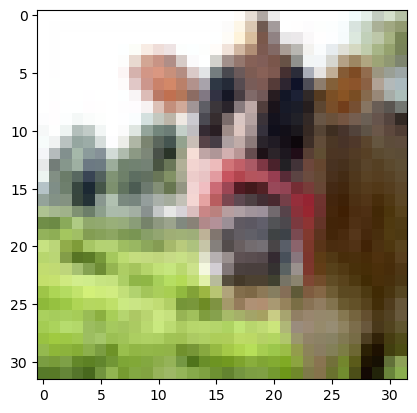

In [3]:
plt.imshow(x_train[0])

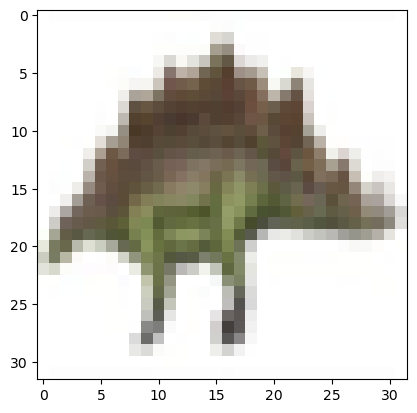

In [4]:
plt.imshow(x_train[1])

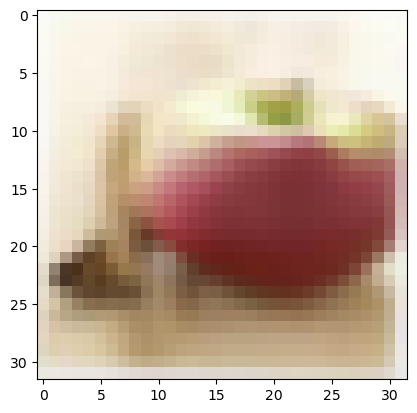

In [5]:
plt.imshow(x_train[2])

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [6]:
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [7]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes=100)
y_test_cat = to_categorical(y_test, num_classes=100)

In [8]:
from sklearn.model_selection import train_test_split

x_train_norm_train, x_train_norm_val, y_train_cat_train, y_train_cat_val = train_test_split(
    x_train_norm, 
    y_train_cat,
    test_size=0.2,
    random_state=42
)

## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(16, (3,3), padding = 'valid', activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3,3), padding = 'valid', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), padding = 'valid', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 15, 15, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 2, 2, 64)       

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> The Categorical Crossentropy loss function is suitable for multiclass classification with softmax activation in the output layer.
- <b>Optimizer:</b> The Adam optimizer dynamically adjusts the learning rate during training for faster convergence.

In [26]:
from keras import optimizers

model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(),
    metrics=['accuracy']
)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.
- The validation loss and accuracy seem to have reached a plateau and increasing the number of epochs beyond 20 will not yield better results.

In [27]:
history = model.fit(
    x_train_norm_train,
    y_train_cat_train,
    epochs=20,
    batch_size=32,
    validation_data=(x_train_norm_val, y_train_cat_val)
)

Epoch 1/20
1250/1250 [==============================] - 75s 57ms/step - loss: 4.0523 - accuracy: 0.0797 - val_loss: 3.6124 - val_accuracy: 0.1513
Epoch 2/20
1250/1250 [==============================] - 55s 44ms/step - loss: 3.4338 - accuracy: 0.1792 - val_loss: 3.2997 - val_accuracy: 0.1993
Epoch 3/20
1250/1250 [==============================] - 53s 42ms/step - loss: 3.1638 - accuracy: 0.2244 - val_loss: 3.0931 - val_accuracy: 0.2357
Epoch 4/20
1250/1250 [==============================] - 50s 40ms/step - loss: 2.9773 - accuracy: 0.2621 - val_loss: 2.9954 - val_accuracy: 0.2646
Epoch 5/20
1250/1250 [==============================] - 49s 39ms/step - loss: 2.8375 - accuracy: 0.2924 - val_loss: 2.9679 - val_accuracy: 0.2757
Epoch 6/20
1250/1250 [==============================] - 50s 40ms/step - loss: 2.7388 - accuracy: 0.3097 - val_loss: 2.8656 - val_accuracy: 0.2949
Epoch 7/20
1250/1250 [==============================] - 51s 40ms/step - loss: 2.6474 - accuracy: 0.3262 - val_loss: 2.8330 -

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> 0.3340
- <b>Other metric:</b> Loss
- <b>Reason for selection:</b> Loss is a measure of how far the predicted values are from the true values.
- <b>Value of metric:</b> 2.7617
- <b>Interpretation of metric value:</b> While it decreased when compared to the validation loss of the first epoch, there seems to be room for improvement with a better model.

In [29]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 5s 15ms/step - loss: 2.7617 - accuracy: 0.3340


[2.761671781539917, 0.33399999141693115]

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?
- The plots show that the training accuracy and loss kept improving while the validation accuracy and loss reached a plateau with little improvement beyond 10 epochs. This indicates that the model is overfitting.

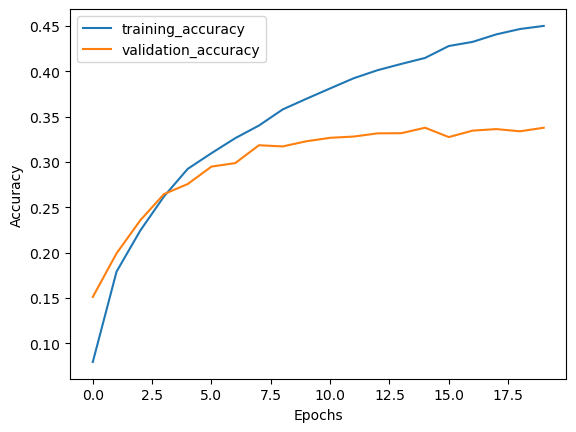

In [31]:
plt.plot(history.history["accuracy"], label="training_accuracy")
plt.plot(history.history["val_accuracy"], label="validation_accuracy")
plt.legend(loc="upper left")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

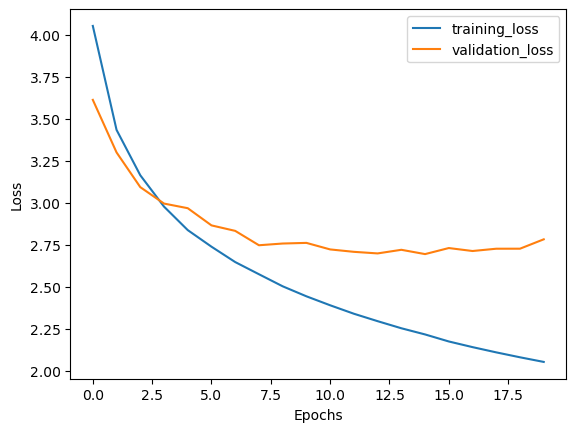

In [33]:
plt.plot(history.history["loss"], label="training_loss")
plt.plot(history.history["val_loss"], label="validation_loss")
plt.legend(loc="upper right")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [34]:
predictions = model.predict(x_test_norm)

predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test_cat, axis=1)
classified_indices = np.where(predicted_classes == true_classes)[0]
misclassified_indices = np.where(predicted_classes != true_classes)[0]

classified_samples = x_test[classified_indices]
classified_labels = y_test[classified_indices]
misclassified_samples = x_test[misclassified_indices]
misclassified_labels = y_test[misclassified_indices]

313/313 [==============================] - 9s 17ms/step


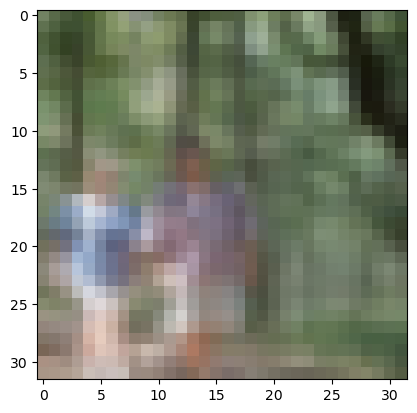

In [44]:
plt.imshow(classified_samples[0].reshape(32, 32, 3))

In [45]:
print(classified_labels[0])

[33]


<BarContainer object of 100 artists>

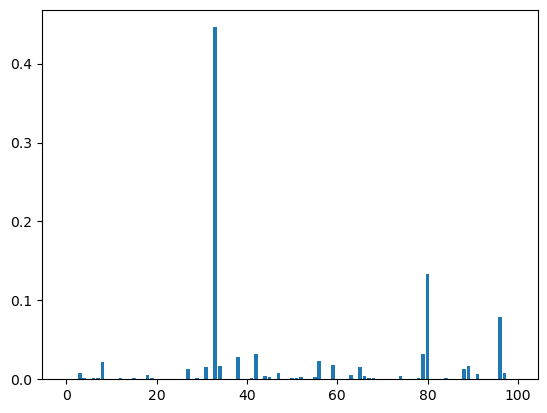

In [42]:
plt.bar(x=range(100), height=predictions[classified_indices[0]])

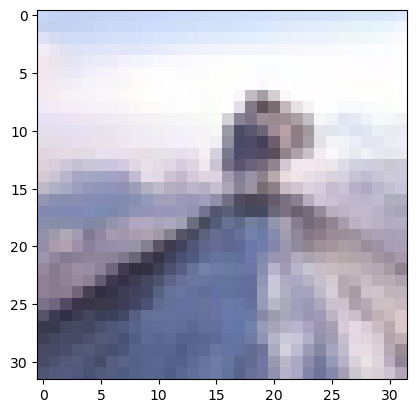

In [46]:
plt.imshow(misclassified_samples[0].reshape(32, 32, 3))

In [47]:
print(misclassified_labels[0])

[49]


<BarContainer object of 100 artists>

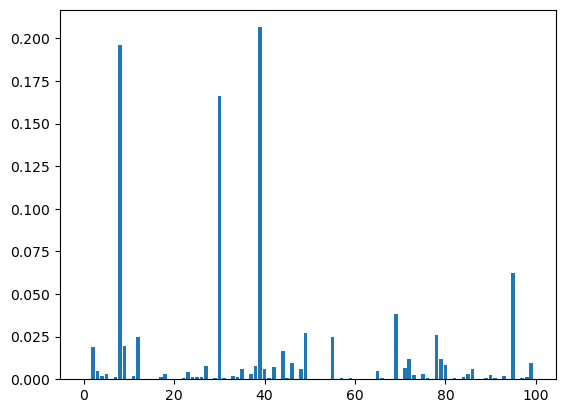

In [48]:
plt.bar(x=range(100), height=predictions[misclassified_indices[0]])

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.
- Batch Normalization and Dropout are regularization techniques that help prevent model overfitting. Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1. Dropout randomly sets input units to 0 with a set frequency at each step during training.

In [55]:
from keras.layers import Dropout, BatchNormalization

model = Sequential()
model.add(Conv2D(16, (3,3), padding = 'valid', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3,3), padding = 'valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), padding = 'valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(100, activation='softmax'))

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 15, 15, 16)       0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 15, 15, 16)        0         
                                                                 
 conv2d_39 (Conv2D)          (None, 13, 13, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 32)     

In [56]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(),
    metrics=['accuracy']
)

In [57]:
history = model.fit(
    x_train_norm_train,
    y_train_cat_train,
    epochs=20,
    batch_size=32,
    validation_data=(x_train_norm_val, y_train_cat_val)
)

Epoch 1/20
1250/1250 [==============================] - 103s 77ms/step - loss: 4.0106 - accuracy: 0.0988 - val_loss: 3.8292 - val_accuracy: 0.1098
Epoch 2/20
1250/1250 [==============================] - 70s 56ms/step - loss: 3.4686 - accuracy: 0.1746 - val_loss: 3.2423 - val_accuracy: 0.2190
Epoch 3/20
1250/1250 [==============================] - 69s 55ms/step - loss: 3.2400 - accuracy: 0.2155 - val_loss: 3.0943 - val_accuracy: 0.2411
Epoch 4/20
1250/1250 [==============================] - 69s 56ms/step - loss: 3.0784 - accuracy: 0.2444 - val_loss: 3.1083 - val_accuracy: 0.2392
Epoch 5/20
1250/1250 [==============================] - 74s 59ms/step - loss: 2.9716 - accuracy: 0.2629 - val_loss: 2.7922 - val_accuracy: 0.2999
Epoch 6/20
1250/1250 [==============================] - 63s 51ms/step - loss: 2.8955 - accuracy: 0.2765 - val_loss: 2.7007 - val_accuracy: 0.3155
Epoch 7/20
1250/1250 [==============================] - 63s 51ms/step - loss: 2.8355 - accuracy: 0.2901 - val_loss: 2.6884 

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- The new model has higher accuracy (0.3855) and lower loss (2.3829).

In [58]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 6s 18ms/step - loss: 2.3829 - accuracy: 0.3855


[2.382939577102661, 0.3855000138282776]

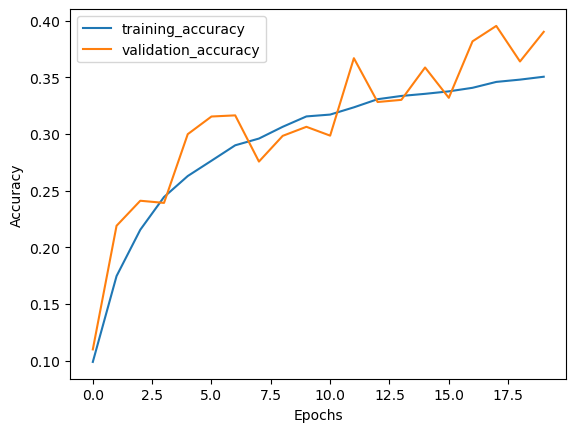

In [59]:
plt.plot(history.history["accuracy"], label="training_accuracy")
plt.plot(history.history["val_accuracy"], label="validation_accuracy")
plt.legend(loc="upper left")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

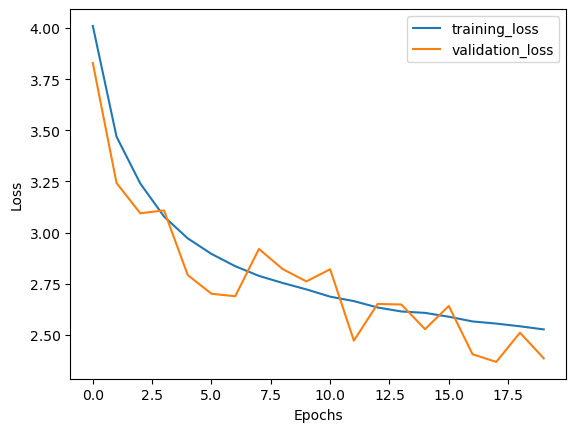

In [60]:
plt.plot(history.history["loss"], label="training_loss")
plt.plot(history.history["val_loss"], label="validation_loss")
plt.legend(loc="upper right")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [61]:
predictions = model.predict(x_test_norm)

predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test_cat, axis=1)
classified_indices = np.where(predicted_classes == true_classes)[0]
misclassified_indices = np.where(predicted_classes != true_classes)[0]

classified_samples = x_test[classified_indices]
classified_labels = y_test[classified_indices]
misclassified_samples = x_test[misclassified_indices]
misclassified_labels = y_test[misclassified_indices]

313/313 [==============================] - 6s 16ms/step


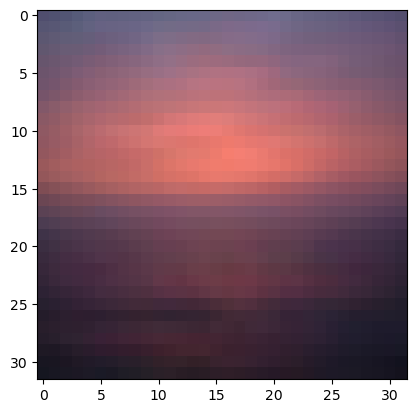

In [62]:
plt.imshow(classified_samples[0].reshape(32, 32, 3))

In [63]:
print(classified_labels[0])

[71]


<BarContainer object of 100 artists>

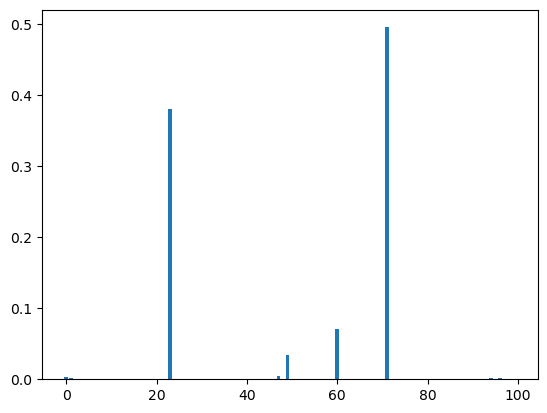

In [64]:
plt.bar(x=range(100), height=predictions[classified_indices[0]])

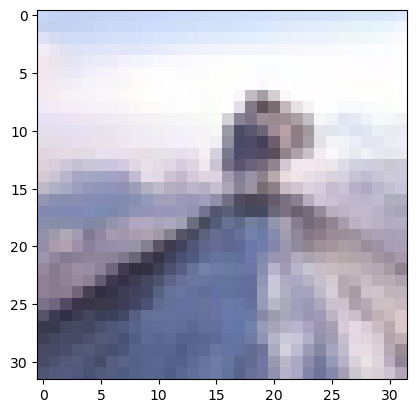

In [65]:
plt.imshow(misclassified_samples[0].reshape(32, 32, 3))

In [66]:
print(misclassified_labels[0])

[49]


<BarContainer object of 100 artists>

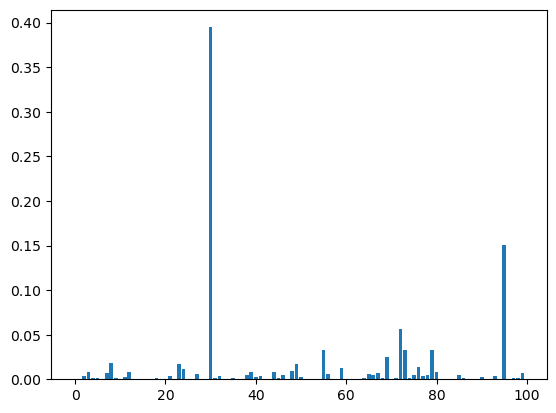

In [67]:
plt.bar(x=range(100), height=predictions[misclassified_indices[0]])

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.
- The plots show that the validation accuracy and loss are no longer reaching a plateau indicating that the new model is not overfitting. Therefore, the regularization techniques were effective. Further improvement is possible with the implemtation of data augmentation techniques that increase the diversity of the training set by applying random transformations such as image rotation.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.